# Lab 2 - Swiss dataset


1. Relationships

2. Load in the data “swiss.csv” from moodle and look at the readme file for information on dataset.

In [32]:
import pandas as pd

swiss = pd.read_csv('swiss.csv')

swiss.head()

,Name,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


3. Investigate if any the numerical variables seem to have a linear relationship by producing scatterplots.

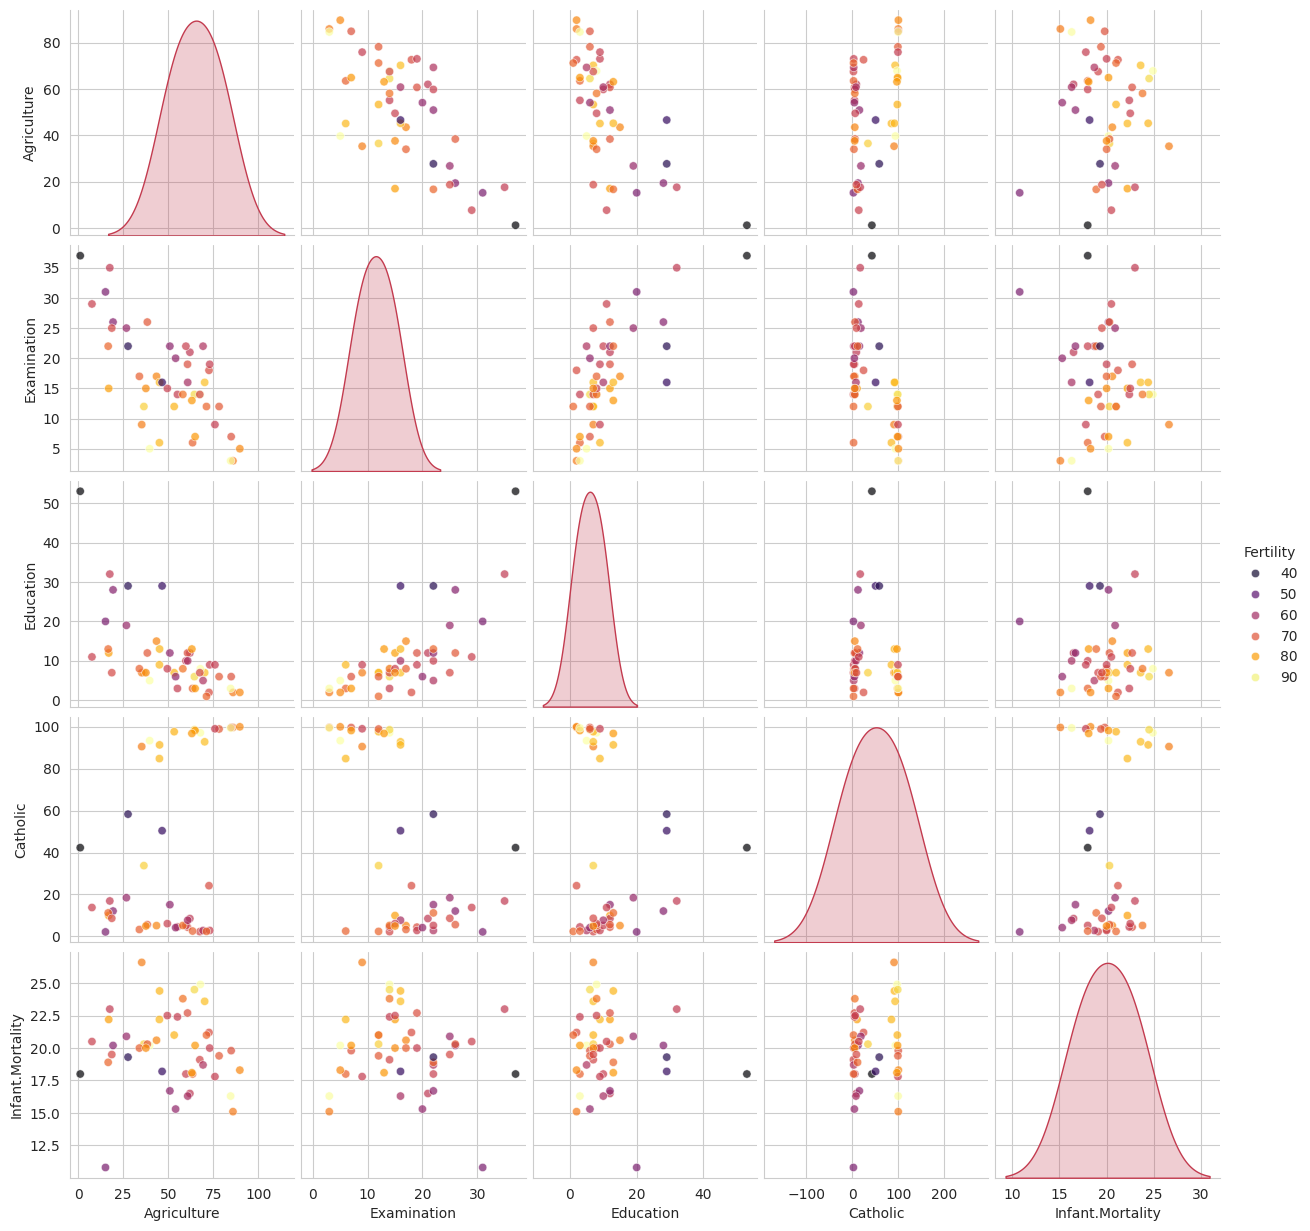

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style first
sns.set_style("whitegrid")

# Create pairplot with custom colors
pairplot = sns.pairplot(swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']], 
                        hue='Fertility', 
                        palette='inferno',
                        plot_kws={'alpha': 0.7})  # Add transparency

plt.show()

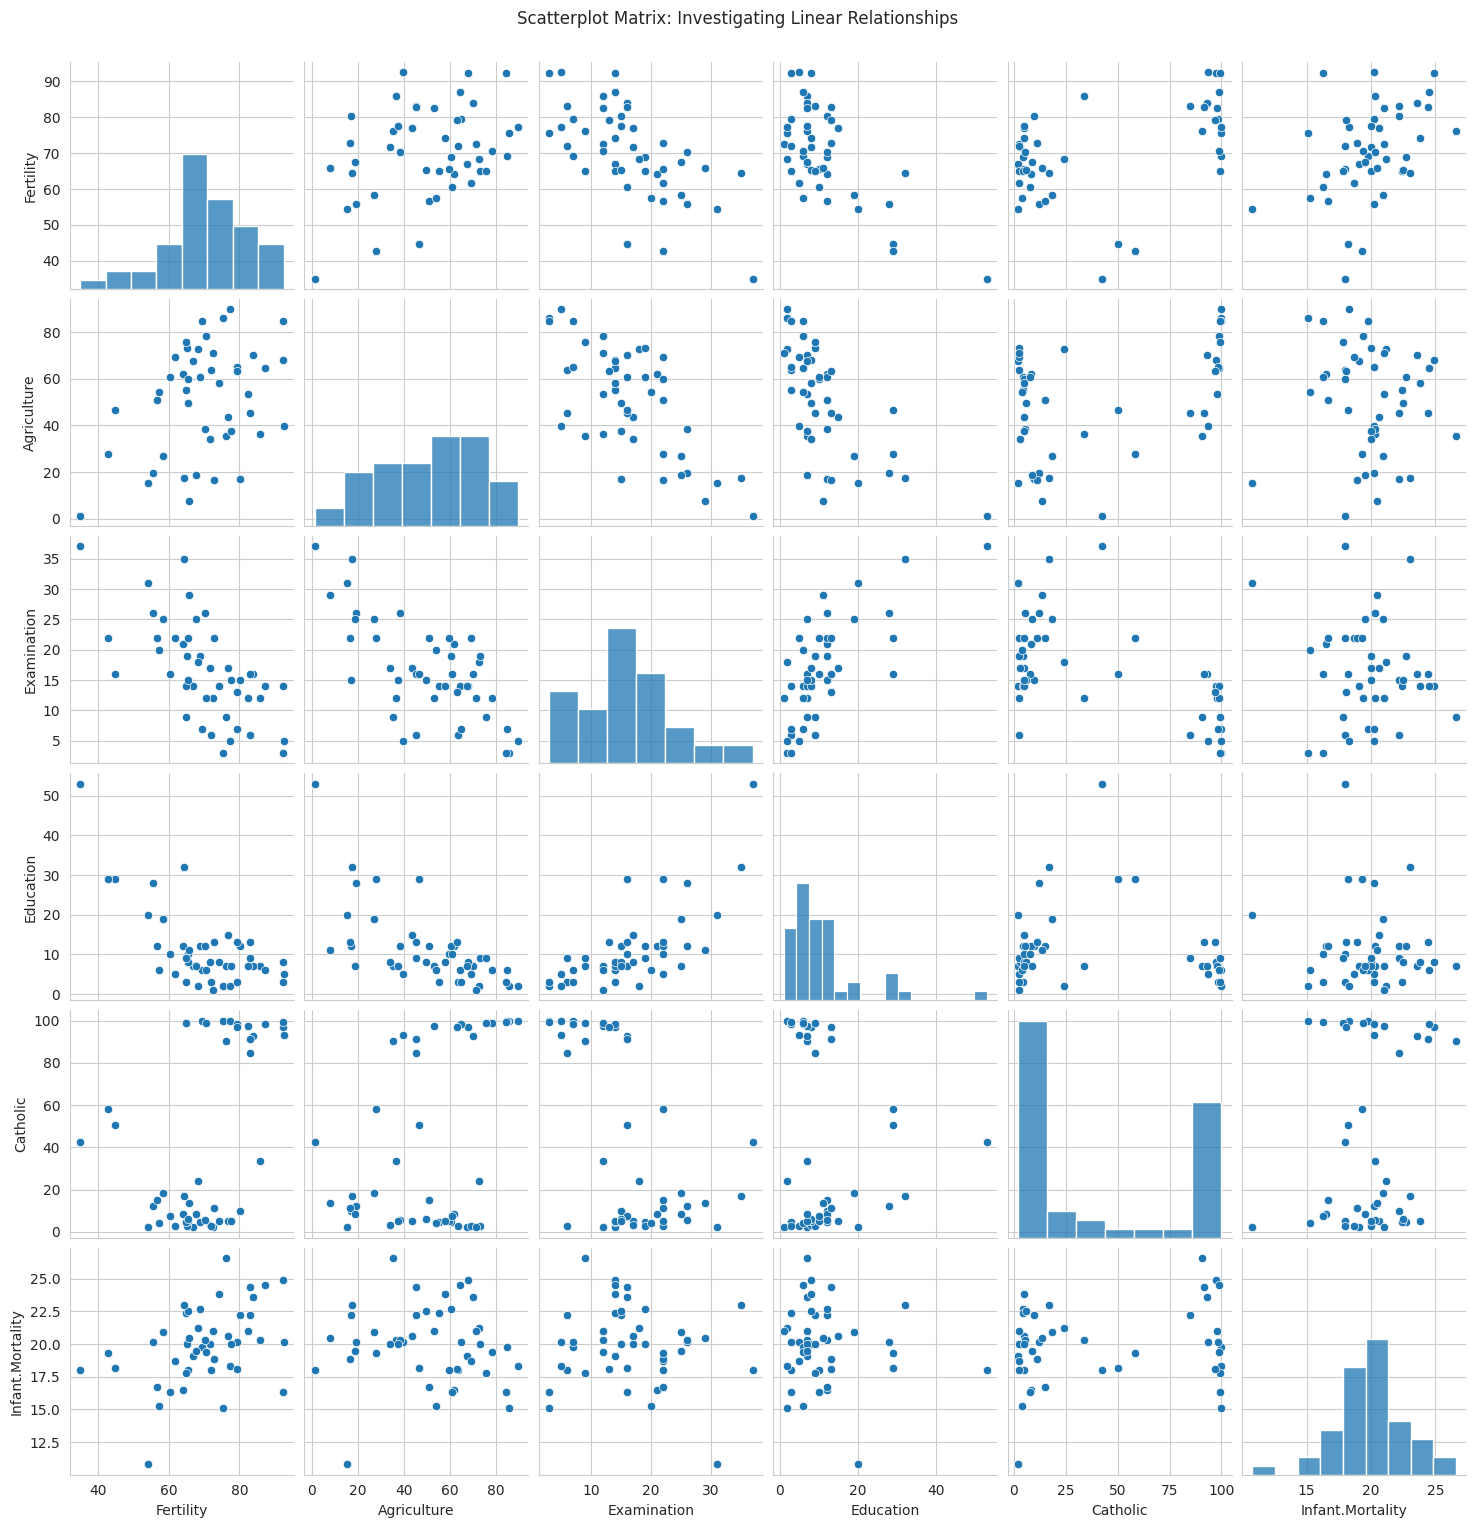

In [34]:
    # Create pairplot to see all relationships
    sns.pairplot(swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']])
    plt.suptitle("Scatterplot Matrix: Investigating Linear Relationships", y=1.02)
    plt.show()

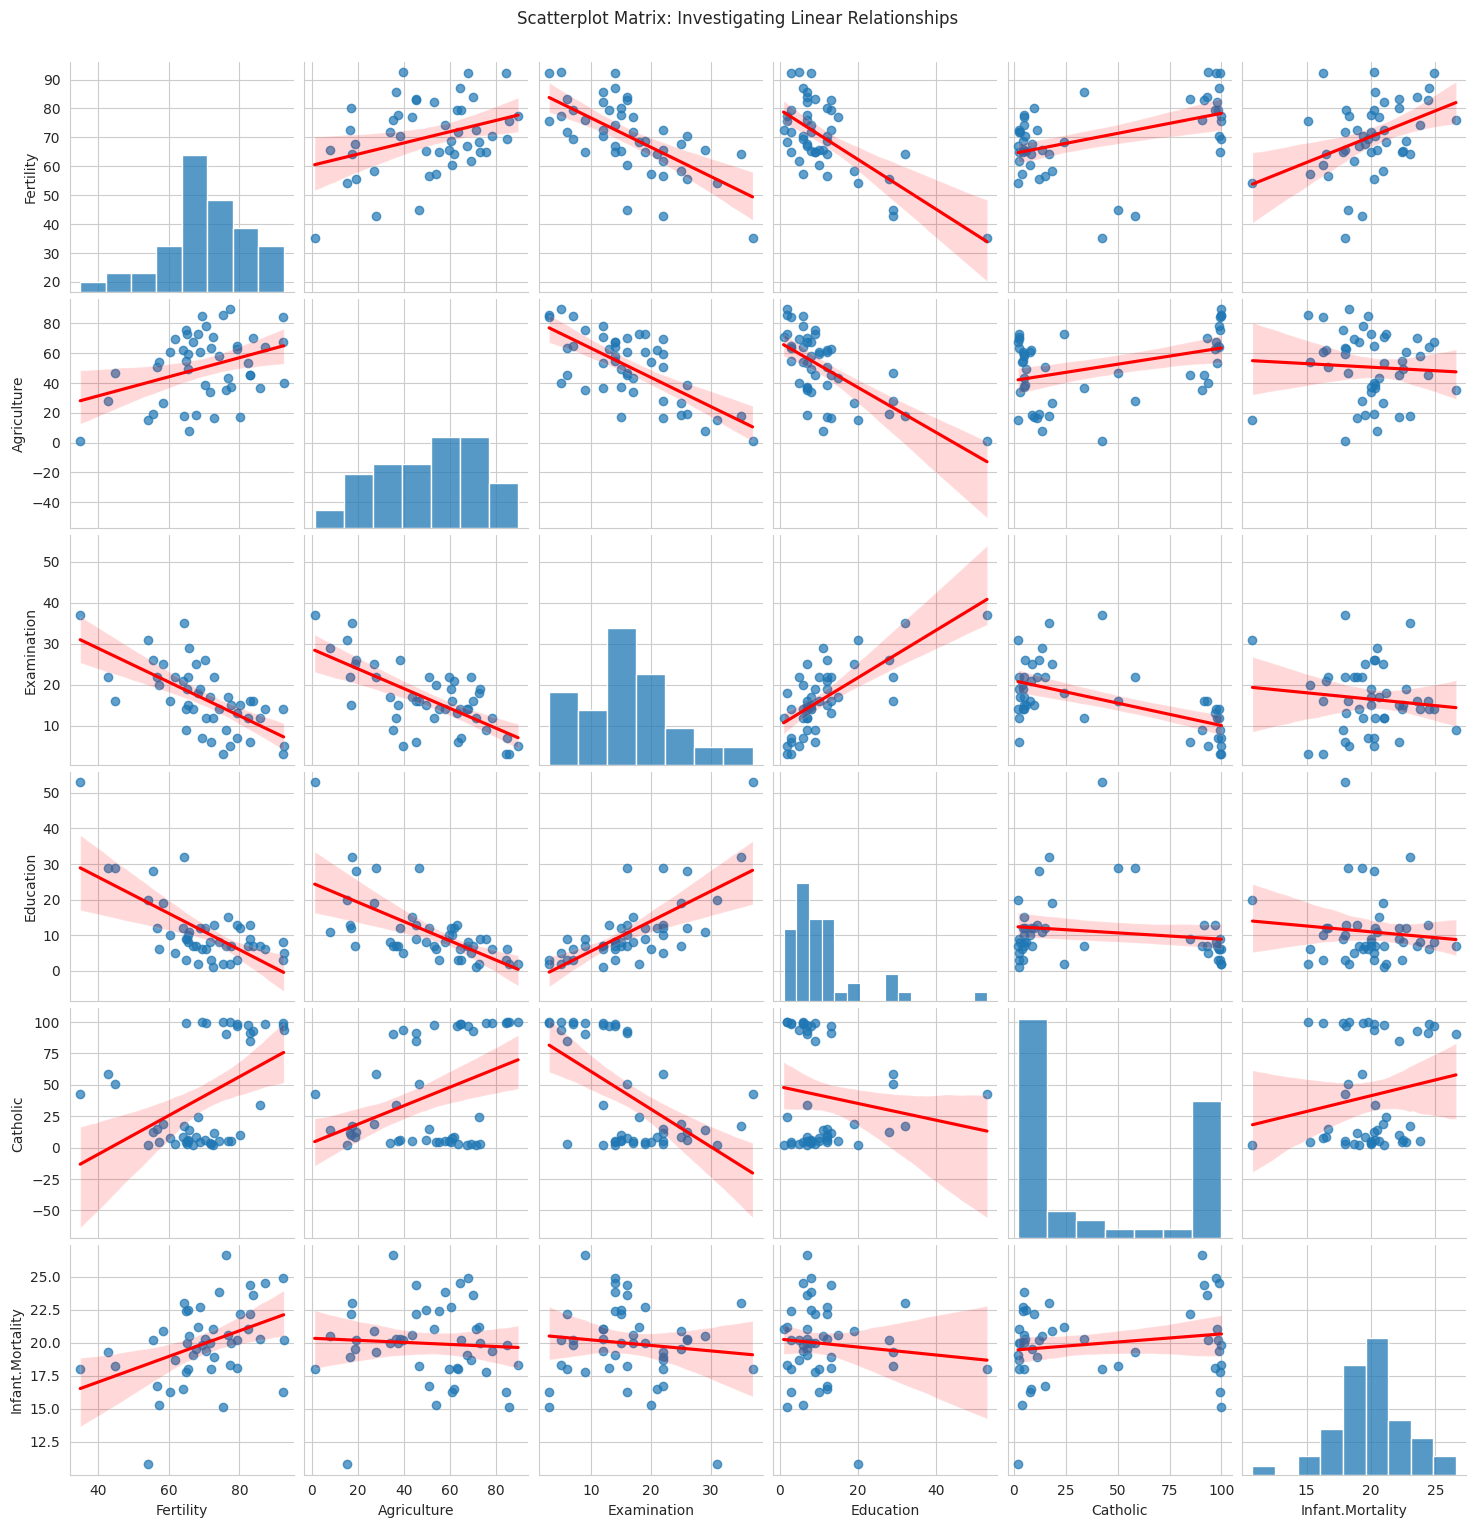

In [35]:
# Create pairplot to see all relationships with regression lines
sns.pairplot(swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']], 
             kind='reg',  # This adds regression lines
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}})
plt.suptitle("Scatterplot Matrix: Investigating Linear Relationships", y=1.02)
plt.show()

In [36]:
#pip install statsmodels

4. With those that do show signs of a linear relationship, calculate their Pearson correlations and interpret the results.


In [ ]:
# Calculate Pearson correlation matrix
corr_matrix = swiss[['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']].corr(method='pearson')

print("PEARSON CORRELATION MATRIX:")
print(corr_matrix.round(3))

PEARSON CORRELATION MATRIX:
                  Fertility  Agriculture  Examination  Education  Catholic  \
Fertility             1.000        0.353       -0.646     -0.664     0.464   
Agriculture           0.353        1.000       -0.687     -0.640     0.401   
Examination          -0.646       -0.687        1.000      0.698    -0.573   
Education            -0.664       -0.640        0.698      1.000    -0.154   
Catholic              0.464        0.401       -0.573     -0.154     1.000   
Infant.Mortality      0.417       -0.061       -0.114     -0.099     0.175   

                  Infant.Mortality  
Fertility                    0.417  
Agriculture                 -0.061  
Examination                 -0.114  
Education                   -0.099  
Catholic                     0.175  
Infant.Mortality             1.000  


5. With those that do show signs of non-linear relationship, calculate appropriate correlations and interpret the results.

In [41]:
# SIMPLE CODE: Check non-linear relationships
from scipy.stats import spearmanr

# Check Catholic vs Education
# Pearson correlation measures LINEAR relationships (straight lines)
pearson1 = swiss['Catholic'].corr(swiss['Education'])
# Spearman correlation measures NON-LINEAR relationships (any monotonic pattern)
spearman1, _ = spearmanr(swiss['Catholic'], swiss['Education'])

# Print explanation of what each correlation type measures
print("Linear = Pearson, Non-linear = Spearman")

print("Catholic vs Education:")
print(f"Linear: {pearson1:.3f}")  # How well it fits a straight line
print(f"Non-linear: {spearman1:.3f}")  # How well it follows any consistent pattern
# If the two values are very different, the relationship is non-linear
if abs(spearman1 - pearson1) > 0.15:
    print("→ NON-LINEAR")  # Big difference means curved relationship
print()

# Check Catholic vs Infant.Mortality  
# Same process for this variable pair
pearson2 = swiss['Catholic'].corr(swiss['Infant.Mortality'])
spearman2, _ = spearmanr(swiss['Catholic'], swiss['Infant.Mortality'])

print("Catholic vs Infant.Mortality:")
print(f"Linear: {pearson2:.3f}")
print(f"Non-linear: {spearman2:.3f}")
if abs(spearman2 - pearson2) > 0.15:
    print("→ NON-LINEAR")  # Flag if significantly non-linear
print()

# Check Agriculture vs Infant.Mortality
# Same process for this variable pair
pearson3 = swiss['Agriculture'].corr(swiss['Infant.Mortality'])
spearman3, _ = spearmanr(swiss['Agriculture'], swiss['Infant.Mortality'])

print("Agriculture vs Infant.Mortality:")
print(f"Linear: {pearson3:.3f}") 
print(f"Non-linear: {spearman3:.3f}")
if abs(spearman3 - pearson3) > 0.15:
    print("→ NON-LINEAR")  # Flag if significantly non-linear

Linear = Pearson, Non-linear = Spearman
Catholic vs Education:
Linear: -0.154
Non-linear: -0.144

Catholic vs Infant.Mortality:
Linear: 0.175
Non-linear: 0.066

Agriculture vs Infant.Mortality:
Linear: -0.061
Non-linear: -0.152


## **Summary: All relationships are LINEAR**

### **1. Catholic vs Education:**
- Linear: -0.154
- Non-linear: -0.144
- **Difference: 0.010** → Very small difference
- **Interpretation**: This is a LINEAR relationship (weak negative)

### **2. Catholic vs Infant.Mortality:**
- Linear: 0.175  
- Non-linear: 0.066
- **Difference: 0.109** → Moderate difference, but still < 0.15
- **Interpretation**: This is a LINEAR relationship (very weak positive)

### **3. Agriculture vs Infant.Mortality:**
- Linear: -0.061
- Non-linear: -0.152
- **Difference: 0.091** → Moderate difference, but still < 0.15
- **Interpretation**: This is a LINEAR relationship (very weak negative)

## **Key Conclusion:**
**None of these relationships show strong signs of being non-linear.** All the differences between Pearson and Spearman are less than 0.15, which means the relationships are essentially linear (even if they're weak).

## **What this means for your analysis:**
- You can use Pearson correlation for all these relationships
- No need to worry about complex curved patterns
- The weak correlations suggest these variable pairs don't have strong relationships of any kind

**In your answer, you would write:** "None of the examined variable pairs show significant non-linear relationships, as all Pearson-Spearman differences are below the 0.15 threshold."

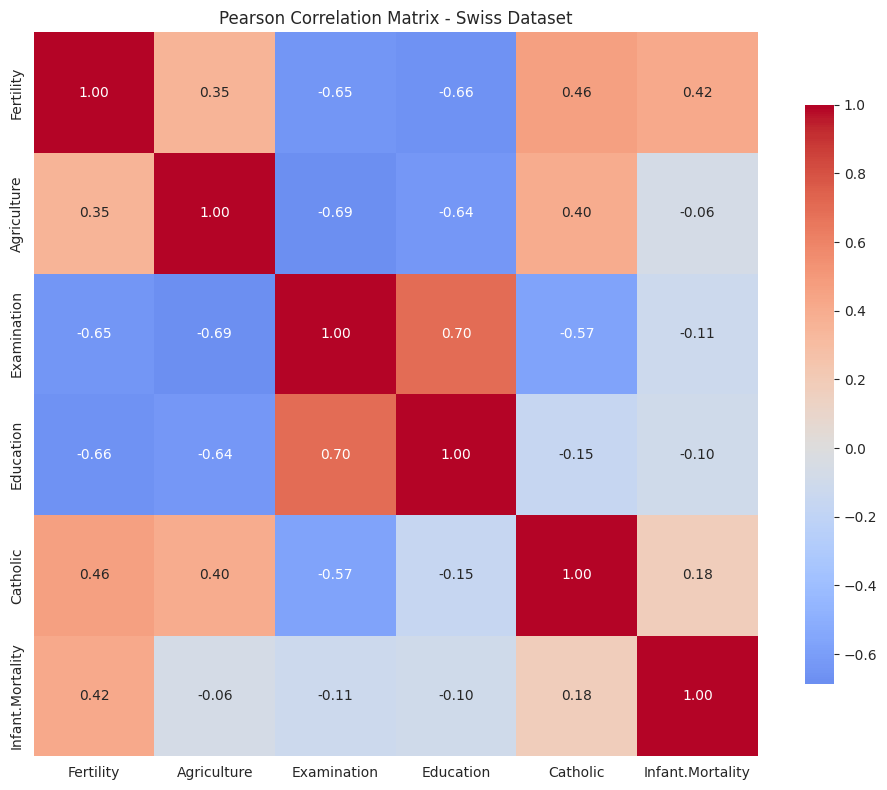

In [50]:

# Enhanced heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, square=True, cbar_kws={'shrink': 0.8})
plt.title('Pearson Correlation Matrix - Swiss Dataset')
plt.tight_layout()
plt.show()

## What a Correlation Matrix Compares

A correlation matrix **compares each variable against every other variable** in the dataset. It's like creating a "relationship map" between all pairs.

### In your code:
You have 6 variables: `['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']`

The correlation matrix creates a **6×6 grid** where:
- Rows and columns both represent the same 6 variables
- Each cell shows the correlation between the row variable and column variable

### Example of what's being compared:
```
Fertility vs Agriculture
Fertility vs Examination  
Fertility vs Education
Fertility vs Catholic
Fertility vs Infant.Mortality
Agriculture vs Examination
Agriculture vs Education
...and so on for ALL possible pairs
```

## How to Read the Matrix:

```python
# The diagonal will always be 1.0 because:
Fertility vs Fertility = 1.0 (perfect correlation)
Agriculture vs Agriculture = 1.0
# etc.

# The other cells show relationships like:
Fertility vs Education = -0.66 (strong negative correlation)
# This means: as Education increases, Fertility tends to decrease
```

## What the Numbers Mean:
- **+1.0**: Perfect positive correlation (both increase together)
- **0.0**: No relationship
- **-1.0**: Perfect negative correlation (one increases, other decreases)
- **±0.7 to ±1.0**: Strong relationship
- **±0.3 to ±0.7**: Moderate relationship  
- **±0.0 to ±0.3**: Weak relationship

## So you're NOT misunderstanding - you're exactly right!
The matrix compares **each variable with every other variable** to answer questions like:
- "When agriculture employment increases, what happens to fertility rates?"
- "Is there a relationship between education and infant mortality?"

The heatmap just makes these patterns visually obvious through color coding!

# 6. What is the response variable and the research question of interest?

we are interested on what impacts fertility